In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos relevantes
cpu_usage = pd.read_csv('fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv')
memory_usage = pd.read_csv('fhir-fastapiapp/Memory Usage-data-2024-08-06 08_30_44.csv')
disk_io_utilization = pd.read_csv('fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv')
network_utilization = pd.read_csv('fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv')
response_time = pd.read_csv('fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv')
pod_counts = pd.read_csv('fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv')
memory_saturation = pd.read_csv('fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv')
cpu_saturation = pd.read_csv('fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv')


request_volume = pd.read_csv('fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv')
request_concurrency = pd.read_csv('fhir-fastapiapp/Request Concurrency-data-2024-08-06 08_24_27.csv')
response_time = pd.read_csv('fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv')
request_count_by_response_code = pd.read_csv('fhir-fastapiapp/Request Count in last minute by Response Code-data-2024-08-06 08_23_41.csv')
observed_concurrency = pd.read_csv('fhir-fastapiapp/Observed Concurrency-data-as-joinbyfield-2024-08-06 08_23_11.csv')
pod_counts = pd.read_csv('fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv')
pod_memory_usage = pd.read_csv('fhir-fastapiapp/Pod Memory Usage-data-2024-08-06 08_19_16.csv')
revision_cpu_usage = pd.read_csv('fhir-fastapiapp/Revision CPU Usage-data-as-joinbyfield-2024-08-06 08_19_02.csv')
request_concurrency = pd.read_csv('fhir-fastapiapp/Request Concurrency-data-2024-08-06 08_18_40.csv')
revision_pod_counts = pd.read_csv('fhir-fastapiapp/Revision Pod Counts-data-as-joinbyfield-2024-08-06 08_18_08.csv')



In [27]:
print(cpu_usage.columns)
print(memory_usage.columns)
print(disk_io_utilization.columns)
print(network_utilization.columns)
print(response_time.columns)
print(pod_counts.columns)
print(cpu_saturation.columns)


Index(['Time', '192.168.49.2:10250'], dtype='object')
Index(['Time', '100 -\n(\n  avg(node_memory_MemAvailable_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""}) /\n  avg(node_memory_MemTotal_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""})\n* 100\n)\n'], dtype='object')
Index(['Time', '192.168.49.2:9100 sda'], dtype='object')
Index(['Time', '192.168.49.2:9100 Receive'], dtype='object')
Index(['Time', '00008 (p50)', '00008 (p90)', '00008 (p95)', '00008 (p99)'], dtype='object')
Index(['Time', 'Desired Pods', 'Actual Pods'], dtype='object')
Index(['Time', '192.168.49.2:9100'], dtype='object')


In [28]:

# Convertir las marcas de tiempo a datetime
cpu_usage['Time'] = pd.to_datetime(cpu_usage['Time'])
memory_usage['Time'] = pd.to_datetime(memory_usage['Time'])
disk_io_utilization['Time'] = pd.to_datetime(disk_io_utilization['Time'])
network_utilization['Time'] = pd.to_datetime(network_utilization['Time'])
response_time['Time'] = pd.to_datetime(response_time['Time'])
pod_counts['Time'] = pd.to_datetime(pod_counts['Time'])
memory_saturation['Time'] = pd.to_datetime(memory_saturation['Time'])
cpu_saturation['Time'] = pd.to_datetime(cpu_saturation['Time'])

# Unir los datos en un único dataframe basado en la marca de tiempo
merged_data = pd.merge_asof(response_time.sort_values('Time'), cpu_usage.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, memory_usage.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, disk_io_utilization.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, network_utilization.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, pod_counts.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, memory_saturation.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, cpu_saturation.sort_values('Time'), on='Time')




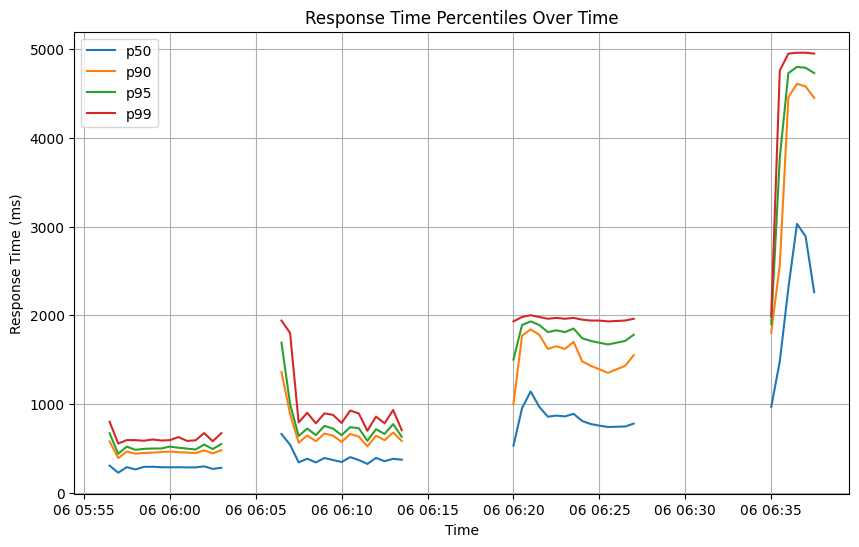

In [29]:
def convert_to_ms(value):
    if isinstance(value, str):
        if ' ms' in value:
            return float(value.replace(' ms', ''))
        elif ' s' in value:
            return float(value.replace(' s', '')) * 1000
    return float(value)

# Apply the conversion function to each column
response_time['00008 (p50)'] = response_time['00008 (p50)'].apply(convert_to_ms)
response_time['00008 (p90)'] = response_time['00008 (p90)'].apply(convert_to_ms)
response_time['00008 (p95)'] = response_time['00008 (p95)'].apply(convert_to_ms)
response_time['00008 (p99)'] = response_time['00008 (p99)'].apply(convert_to_ms)

plt.figure(figsize=(10, 6))
plt.plot(response_time['Time'], response_time['00008 (p50)'], label='p50')
plt.plot(response_time['Time'], response_time['00008 (p90)'], label='p90')
plt.plot(response_time['Time'], response_time['00008 (p95)'], label='p95')
plt.plot(response_time['Time'], response_time['00008 (p99)'], label='p99')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Response Time (ms)')
plt.title('Response Time Percentiles Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [30]:
print(merged_data.columns)
response_time.head

Index(['Time', '00008 (p50)', '00008 (p90)', '00008 (p95)', '00008 (p99)',
       '192.168.49.2:10250',
       '100 -\n(\n  avg(node_memory_MemAvailable_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""}) /\n  avg(node_memory_MemTotal_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""})\n* 100\n)\n',
       '192.168.49.2:9100 sda', '192.168.49.2:9100 Receive', 'Desired Pods',
       'Actual Pods', '192.168.49.2:9100_x', '192.168.49.2:9100_y'],
      dtype='object')


<bound method NDFrame.head of                   Time  00008 (p50)  00008 (p90)  00008 (p95)  00008 (p99)
0  2024-08-06 05:56:30        304.0        577.0        669.0        798.0
1  2024-08-06 05:57:00        224.0        388.0        437.0        553.0
2  2024-08-06 05:57:30        287.0        464.0        518.0        592.0
3  2024-08-06 05:58:00        261.0        439.0        482.0        591.0
4  2024-08-06 05:58:30        290.0        446.0        493.0        585.0
..                 ...          ...          ...          ...          ...
83 2024-08-06 06:43:30          NaN          NaN          NaN          NaN
84 2024-08-06 06:44:00          NaN          NaN          NaN          NaN
85 2024-08-06 06:44:30          NaN          NaN          NaN          NaN
86 2024-08-06 06:46:30          NaN          NaN          NaN          NaN
87 2024-08-06 06:47:00          NaN          NaN          NaN          NaN

[88 rows x 5 columns]>

KeyError: 'Response Time'

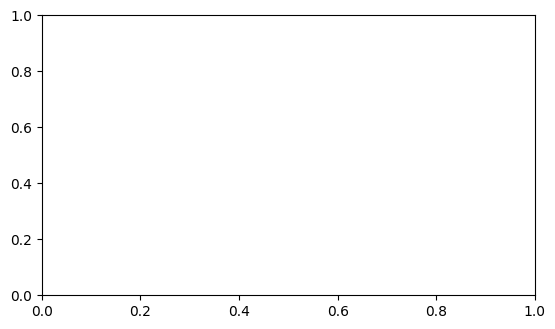

In [31]:
plt.figure(figsize=(14, 8))

# Subplot 1: CPU Usage vs Response Time
plt.subplot(2, 2, 1)
plt.scatter(merged_data['192.168.49.2:10250'], merged_data['Response Time'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Subplot 2: Memory Usage vs Response Time
plt.subplot(2, 2, 2)
plt.scatter(merged_data['Memory Usage'], merged_data['Response Time'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Subplot 3: Disk I/O Utilization vs Response Time
plt.subplot(2, 2, 3)
plt.scatter(merged_data['Disk I/O Utilization'], merged_data['Response Time'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Subplot 4: Network Utilization vs Response Time
plt.subplot(2, 2, 4)
plt.scatter(merged_data['Bytes Transmitted'] + merged_data['Bytes Received'], merged_data['Response Time'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()

In [33]:
import pandas as pd

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for df in dataframes.values():
    df['Time'] = pd.to_datetime(df['Time'])

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')



TypeError: 'value' must be an instance of str or bytes, not a float

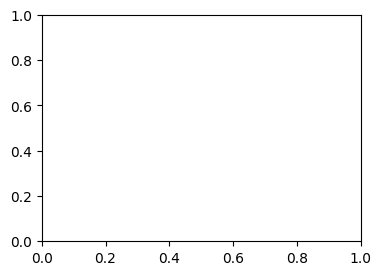

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Memory Usage vs Response Time
plt.subplot(3, 3, 2)
plt.scatter(merged_data['192.168.49.2:10250_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Disk I/O Utilization vs Response Time
plt.subplot(3, 3, 3)
plt.scatter(merged_data['192.168.49.2:9100 sda'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Network Utilization vs Response Time
plt.subplot(3, 3, 4)
plt.scatter(merged_data['192.168.49.2:9100 Receive'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

# Pod Counts vs Response Time
plt.subplot(3, 3, 5)
plt.scatter(merged_data['Actual Pods'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Pod Count')
plt.ylabel('Response Time (ms)')
plt.title('Pod Counts vs Response Time')
plt.grid(True)

# Memory Saturation vs Response Time
plt.subplot(3, 3, 6)
plt.scatter(merged_data['192.168.49.2:9100_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Major Page Faults')
plt.ylabel('Response Time (ms)')
plt.title('Memory Saturation vs Response Time')
plt.grid(True)

# CPU Saturation vs Response Time
plt.subplot(3, 3, 7)
plt.scatter(merged_data['192.168.49.2:9100_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Load1 per CPU')
plt.ylabel('Response Time (ms)')
plt.title('CPU Saturation vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for df in dataframes.values():
    df['Time'] = pd.to_datetime(df['Time'])

# Clean numeric columns
for name, df in dataframes.items():
    for col in df.columns:
        if col != 'Time':
            if 'MiB' in df[col].astype(str).iloc[0]:
                df[col] = pd.to_numeric(df[col].str.replace(r'[^\d.]+', ''), errors='coerce')
            else:
                df[col] = pd.to_numeric(df[col].str.replace(r'[^\d.]+', ''), errors='coerce')

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')

# Display merged dataframe
import ace_tools as tools
tools.display_dataframe_to_user(name="Merged Data for Comprehensive Analysis", dataframe=merged_data)

# Create visualizations
plt.figure(figsize=(14, 10))

# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Memory Usage vs Response Time
plt.subplot(3, 3, 2)
plt.scatter(merged_data['192.168.49.2:10250_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Disk I/O Utilization vs Response Time
plt.subplot(3, 3, 3)
plt.scatter(merged_data['192.168.49.2:9100 sda'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Network Utilization vs Response Time
plt.subplot(3, 3, 4)
plt.scatter(merged_data['192.168.49.2:9100 Receive'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

# Pod Counts vs Response Time
plt.subplot(3, 3, 5)
plt.scatter(merged_data['Actual Pods'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Pod Count')
plt.ylabel('Response Time (ms)')
plt.title('Pod Counts vs Response Time')
plt.grid(True)

# Memory Saturation vs Response Time
plt.subplot(3, 3, 6)
plt.scatter(merged_data['192.168.49.2:9100_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Major Page Faults')
plt.ylabel('Response Time (ms)')
plt.title('Memory Saturation vs Response Time')
plt.grid(True)

# CPU Saturation vs Response Time
plt.subplot(3, 3, 7)
plt.scatter(merged_data['192.168.49.2:9100_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Load1 per CPU')
plt.ylabel('Response Time (ms)')
plt.title('CPU Saturation vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()


AttributeError: Can only use .str accessor with string values!